# "Cross-validation" des modèles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm


## Creer des données synthetiques 

In [2]:
def get_data(
            N = 150,
            p0 = 0.0,
            theta0 = 0,
            wt = np.pi/15,
            theta_std = np.pi/6):
    theta = np.random.randn(N)*theta_std
    a = (theta-theta0)/wt
    p = p0/2 + (1-p0)/(1+np.exp(-a))
    y = np.random.rand(N) < p 

    return theta, p, y



In [3]:
theta, p, y = get_data()


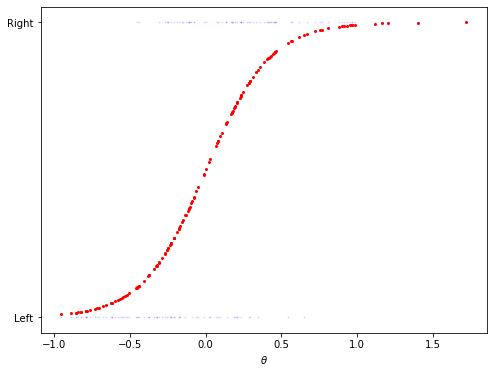

In [4]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);



# utilisons torch

https://blog.goodaudience.com/awesome-introduction-to-logistic-regression-in-pytorch-d13883ceaa90


In [5]:
import torch
torch.set_default_tensor_type('torch.DoubleTensor')
from torch.nn import functional as F

In [6]:

# Same as linear regression!
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)    
        
    def forward(self, x):
        # out = torch.sigmoid(self.linear(x))
        out = torch.sigmoid(self.linear(x))
        return out

logistic_model = LogisticRegressionModel()

In [7]:
logistic_model.linear.weight, logistic_model.linear.bias

(Parameter containing:
 tensor([[-0.8836]], requires_grad=True),
 Parameter containing:
 tensor([0.5370], requires_grad=True))

https://pytorch.org/docs/stable/nn.html#bceloss

In [8]:
criterion = torch.nn.BCELoss()

learning_rate = 0.01
num_epochs = 1e4
#optimizer = torch.optim.Adam(logistic_model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=learning_rate)

In [9]:
labels = torch.Tensor(y[:, None])

In [10]:
y, labels

(array([False,  True, False,  True, False, False,  True,  True, False,
        False,  True,  True,  True, False,  True,  True, False, False,
         True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True, False, False, False,  True, False,  True, False,
        False, False,  True, False, False, False,  True, False,  True,
        False,  True,  True, False,  True, False,  True,  True,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True,  True,  True, False, False, False, False,
        False, False,  True, False, False,  True,  True, False,  True,
         True,  True,  True,  True, False,  True, False, False, False,
         True,  True, False,  True,  True,  True,  True,  True, False,
        False, False,  True, False, False, False,  True,  True,  True,
         True, False, False, False,  True,  True, False, False, False,
         True,  True,  True, False, False,  True, False, False, False,
      

In [11]:
Theta = torch.Tensor(theta[:, None])

In [12]:
theta, Theta

(array([-0.62407285,  0.45968689, -0.78547356,  0.75565354, -0.79212272,
         0.18635792,  0.80597037, -0.18872334,  0.20912404, -0.32310656,
         0.98369885,  0.31235504,  1.40288468,  0.23566546, -0.31094083,
         0.93068245, -0.45670275, -0.7076073 ,  0.10610139,  0.17309784,
         0.22446567, -0.07944272, -0.37295869, -0.15334702,  0.08446677,
         0.96365786, -0.24751097,  0.56342396, -0.11909539, -0.37356262,
        -0.95363634, -0.1777964 ,  0.33229767, -0.25618204, -0.4508449 ,
        -0.6613898 , -0.85610498,  0.28503423,  0.23087016, -0.82151494,
        -0.44983788, -0.82713641,  0.24644598, -0.62081728, -0.14791296,
         0.64789151,  0.95478577,  0.17789818, -0.23324645,  0.23591618,
         0.03055271, -0.44226532, -0.26953561,  0.46300935, -0.54680456,
         0.45198536, -0.6195379 ,  1.20169872, -0.32438852,  0.61616373,
        -0.57660509,  0.2831096 ,  0.54380064,  0.72309077, -0.59784329,
         0.89801611,  0.56692267, -0.20775609, -0.7

In [13]:
# logistic_model(Theta)

In [14]:
iter = 0
for epoch in range(int(num_epochs)):
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward pass to get output/logits
    outputs = logistic_model(Theta)

    # Calculate Loss: 
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    iter += 1

    # Print Loss
    if epoch % 1000 == 0 : 
        print("Iteration: {}. Loss: {}.".format(epoch, loss.item()))

Iteration: 0. Loss: 0.8898227206011976.
Iteration: 1000. Loss: 0.5933109563410497.
Iteration: 2000. Loss: 0.5169276162588349.
Iteration: 3000. Loss: 0.4876419008227394.
Iteration: 4000. Loss: 0.4736728778685088.
Iteration: 5000. Loss: 0.466138282198527.
Iteration: 6000. Loss: 0.46175160302654394.
Iteration: 7000. Loss: 0.45906344635754626.
Iteration: 8000. Loss: 0.4573553599166355.
Iteration: 9000. Loss: 0.45624069616296886.


In [15]:
logistic_model.eval()

LogisticRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

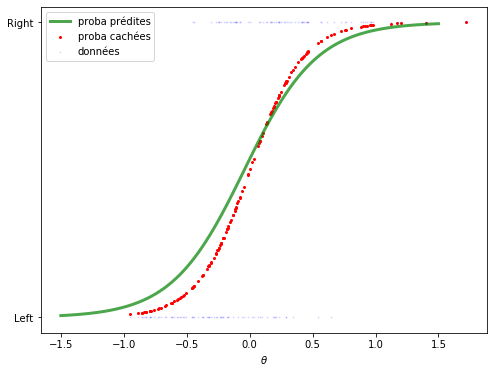

In [16]:
plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r', label='proba cachées')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b', label='données')
x_values = np.linspace(-1.5, 1.50, 100)[:, None]
y_values = logistic_model(torch.Tensor(x_values)).detach().numpy()
plt.plot(x_values, y_values, 'g', alpha=.7, lw=3, label='proba prédites')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);
plt.legend()


## validation

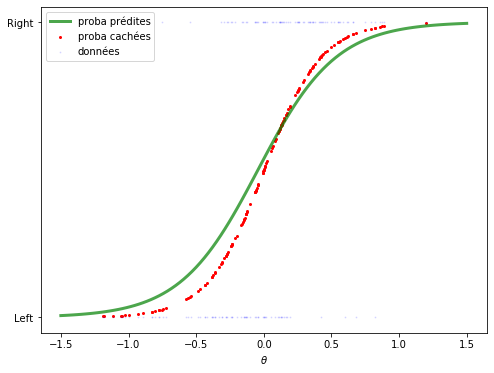

In [17]:
theta, p, y = get_data() # nouvelles données 

labels = torch.Tensor(y[:, None])
Theta = torch.Tensor(theta[:, None])

plt.figure(figsize = (8,6)) 
plt.scatter(theta, p, s=4, color = 'r', label='proba cachées')
plt.scatter(theta, y, s=1, alpha=.1, color = 'b', label='données')
x_values = np.linspace(-1.5, 1.50, 100)[:, None]
y_values = logistic_model(torch.Tensor(x_values)).detach().numpy()
plt.plot(x_values, y_values, 'g', alpha=.7, lw=3, label='proba prédites')
plt.xlabel(r'$\theta$')
plt.yticks([0.,1.],['Left', 'Right']);
plt.legend()
